In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


dataset = {
    'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
    'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
    'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
    'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
    'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

df = pd.DataFrame(dataset,columns=['Id','Age','Income','Gender','MaritalStatus','Buys'])

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Buys'] = le.fit_transform(df['Buys'])

In [3]:
df['Age']

0     1
1     1
2     0
3     2
4     2
5     2
6     0
7     1
8     1
9     2
10    1
11    0
12    0
13    2
Name: Age, dtype: int32

In [4]:
df['Income']

0     0
1     0
2     0
3     2
4     1
5     1
6     1
7     2
8     1
9     2
10    2
11    2
12    0
13    2
Name: Income, dtype: int32

In [5]:
df['Income'].unique()

array([0, 2, 1])

In [6]:
x = df.drop(['Buys'], axis=1)
x

,Id,Age,Income,Gender,MaritalStatus
0,1,1,0,1,1
1,2,1,0,1,0
2,3,0,0,1,1
3,4,2,2,1,1
4,5,2,1,0,1
5,6,2,1,0,0
6,7,0,1,0,0
7,8,1,2,1,1
8,9,1,1,0,0
9,10,2,2,0,1


In [7]:
y = df['Buys']
y


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buys, dtype: int32

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [9]:
clf = clf.fit(x, y)

In [10]:
clf.tree_.feature[0] #returns the index of the root node

0

In [11]:
x.columns[clf.tree_.feature[0]] #returns the feature name of the root node


'Id'

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder on categorical columns of the training data
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

# Encode categorical columns of the test data using the same LabelEncoder object
test_data = pd.DataFrame({'Age': ['<21'], 'Income': ['Low'], 'Gender': ['Female'], 'MaritalStatus': ['Married']})
test_data['Age'] = le.transform(test_data['Age'])
test_data['Income'] = le.transform(test_data['Income'])
test_data['Gender'] = le.transform(test_data['Gender'])
test_data['MaritalStatus'] = le.transform(test_data['MaritalStatus'])

ValueError: y contains previously unseen labels: '<21'

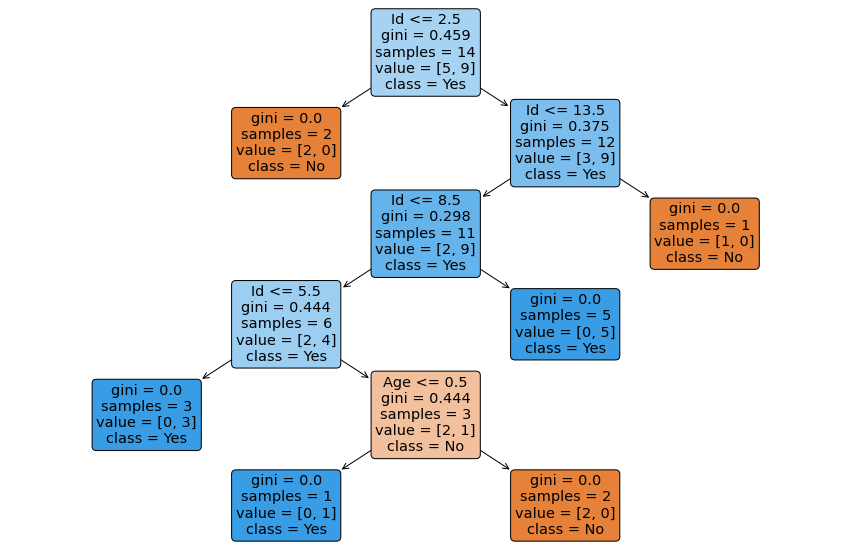

In [15]:
# Visualize the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True, feature_names=x.columns, class_names=['No', 'Yes'])
plt.show()